In [106]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

## 1) Cargamos el dataset
ppt = pd.read_csv("dataset-prueba2.csv")
ppt.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','out']
ppt.head(7)

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,out
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
5,-12.0,-5.0,-1.0,4.0,-16.0,-17.0,-69.0,-16.0,-12.0,-3.0,...,1.0,-36.0,-10.0,-12.0,-16.0,-12.0,-47.0,6.0,-30.0,0
6,43.0,0.0,-2.0,6.0,11.0,26.0,51.0,27.0,-9.0,-2.0,...,41.0,15.0,4.0,10.0,25.0,9.0,13.0,73.0,47.0,0


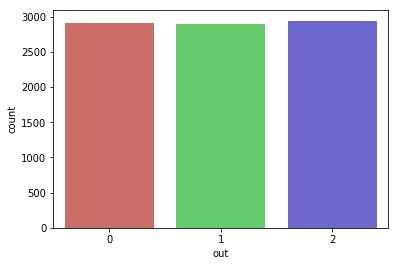

In [107]:
sb.countplot(x='out',data=ppt, palette='hls')

In [108]:
ppt.isnull().sum()

1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
      ..
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
out    0
Length: 65, dtype: int64

In [109]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 65 columns):
1      8755 non-null float64
2      8755 non-null float64
3      8755 non-null float64
4      8755 non-null float64
5      8755 non-null float64
6      8755 non-null float64
7      8755 non-null float64
8      8755 non-null float64
9      8755 non-null float64
10     8755 non-null float64
11     8755 non-null float64
12     8755 non-null float64
13     8755 non-null float64
14     8755 non-null float64
15     8755 non-null float64
16     8755 non-null float64
17     8755 non-null float64
18     8755 non-null float64
19     8755 non-null float64
20     8755 non-null float64
21     8755 non-null float64
22     8755 non-null float64
23     8755 non-null float64
24     8755 non-null float64
25     8755 non-null float64
26     8755 non-null float64
27     8755 non-null float64
28     8755 non-null float64
29     8755 non-null float64
30     8755 non-null float64
31     8755 non-null fl

In [110]:
#Al parecer no hay datos nulos ni incoherencias en alguna fila o columna, por lo que los datos ya estan bastante
#"limpios", ya que por falta de informacion no podemos ver si hay variables que no afecten directamente o no tengan importancia

In [111]:
# Variable objetivo
y = ppt['out']
# Variables predictivas (o explicativas)
X = ppt.iloc[0:len(ppt),0:64]
# Como la variable objetivo está en la ultima columna simplemente no la contamos

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [113]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[803  10  77]
 [  6 754  96]
 [ 60  97 724]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       890
           1       0.88      0.88      0.88       856
           2       0.81      0.82      0.81       881

   micro avg       0.87      0.87      0.87      2627
   macro avg       0.87      0.87      0.87      2627
weighted avg       0.87      0.87      0.87      2627



In [114]:
# Acceso a los valores de presicion y recall
from sklearn.metrics import precision_recall_fscore_support
res = precision_recall_fscore_support(y_test, y_pred)
presicion = res[0]
recall = res[1]
print(presicion, recall)

[0.92405063 0.8757259  0.80713489] [0.90224719 0.88084112 0.82179342]


In [115]:
##Regresion logistica

from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [116]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[404 230 256]
 [124 361 371]
 [212 305 364]]
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       890
           1       0.40      0.42      0.41       856
           2       0.37      0.41      0.39       881

   micro avg       0.43      0.43      0.43      2627
   macro avg       0.44      0.43      0.43      2627
weighted avg       0.44      0.43      0.43      2627



In [117]:
##random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[880   1   9]
 [  3 800  53]
 [ 25  31 825]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.96      0.93      0.95       856
           2       0.93      0.94      0.93       881

   micro avg       0.95      0.95      0.95      2627
   macro avg       0.95      0.95      0.95      2627
weighted avg       0.95      0.95      0.95      2627



In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# probamos con un train size de 0.3

In [119]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1809   30  223]
 [   8 1779  241]
 [ 189  250 1600]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2062
           1       0.86      0.88      0.87      2028
           2       0.78      0.78      0.78      2039

   micro avg       0.85      0.85      0.85      6129
   macro avg       0.85      0.85      0.85      6129
weighted avg       0.85      0.85      0.85      6129



In [120]:
##Regresion logistica

from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [121]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[925 557 580]
 [263 844 921]
 [431 695 913]]
              precision    recall  f1-score   support

           0       0.57      0.45      0.50      2062
           1       0.40      0.42      0.41      2028
           2       0.38      0.45      0.41      2039

   micro avg       0.44      0.44      0.44      6129
   macro avg       0.45      0.44      0.44      6129
weighted avg       0.45      0.44      0.44      6129



In [122]:
##random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[2011    3   48]
 [   7 1879  142]
 [ 103   62 1874]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2062
           1       0.97      0.93      0.95      2028
           2       0.91      0.92      0.91      2039

   micro avg       0.94      0.94      0.94      6129
   macro avg       0.94      0.94      0.94      6129
weighted avg       0.94      0.94      0.94      6129



In [123]:
# podemos comparar las matriz confusion de cada metodo y podemos observar que al bajar el train size la presicion
# aumenta, pero el recall disminuye, esto puede significar que a medida de que el train disminuye las veces que acierta
# el modelo es cada vez mejor, pero comparado con el total de los valores reales del test, no es tan preciso